# Agenda:

* MNIST Dataset
* Model Architecture
* Model Training
* Model inference/prediction

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline

## Part 1: MNIST Dataset

### Loading data

In [2]:
!unzip MNIST_data.zip
!ls

Archive:  MNIST_data.zip
  inflating: test.csv                
  inflating: train.csv               
MNIST Dataset using Keras.ipynb test.csv
MNIST_data.zip                  train.csv


In [3]:
data = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_y = data['label'].values
data_x = data.drop('label', axis=1)

In [6]:
data_x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


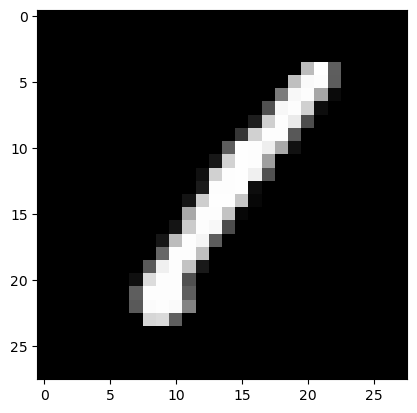

In [7]:
img = data_x.iloc[0].values.reshape((28, 28))
plt.imshow(img, cmap='gray')

In [8]:
set(data_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Part 2: Model Architecture

In [9]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Part 3: Model Training

In [11]:
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.1, random_state=42)

In [12]:
model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
591/591 [==============================] - 1s 2ms/step - loss: 1.7084 - accuracy: 0.8525 - val_loss: 0.5089 - val_accuracy: 0.9052
Epoch 2/5
591/591 [==============================] - 1s 1ms/step - loss: 0.3302 - accuracy: 0.9292 - val_loss: 0.3613 - val_accuracy: 0.9262
Epoch 3/5
591/591 [==============================] - 1s 1ms/step - loss: 0.2215 - accuracy: 0.9433 - val_loss: 0.3334 - val_accuracy: 0.9231
Epoch 4/5
591/591 [==============================] - 1s 1ms/step - loss: 0.1662 - accuracy: 0.9569 - val_loss: 0.2667 - val_accuracy: 0.9395
Epoch 5/5
591/591 [==============================] - 1s 1ms/step - loss: 0.1517 - accuracy: 0.9598 - val_loss: 0.2347 - val_accuracy: 0.9450


## Part 4: Model Prediction

In [13]:
model.predict(X_test).argmax(axis=1)

875/875 [==============================] - 1s 397us/step


array([2, 0, 9, ..., 3, 9, 2])

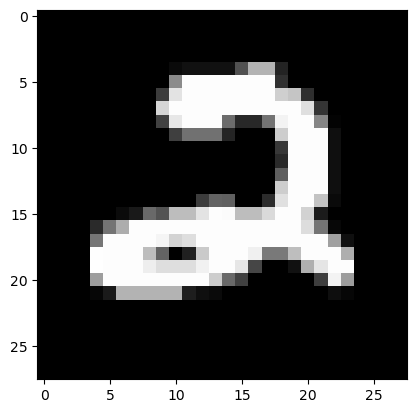

In [14]:
img = X_test.iloc[0].values.reshape((28, 28))
plt.imshow(img, cmap='gray')